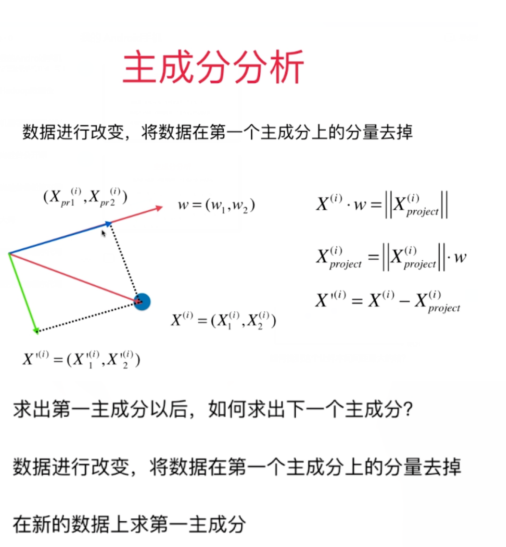

In [9]:
from IPython.display import Image
Image(filename=r"image/x3.png")

# 获得前n个成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

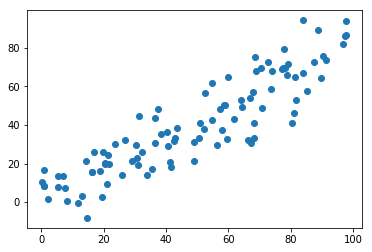

In [3]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)
plt.scatter(X[:,0], X[:,1])

In [6]:
def demean(X):
    return X - np.mean(X,axis=0)

def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = initial_w
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, w)) < epsilon):
            break
        cur_iter += 1
        
    return w

initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.76841281, 0.63995449])

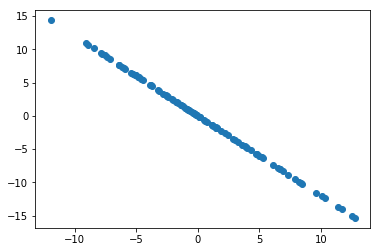

In [11]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    # 去掉第一主成分
    X2[i] = X[i] - X[i].dot(w) * w
plt.scatter(X2[:,0], X2[:,1])

In [12]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63995449,  0.76841281])

In [13]:
# w与w2互相垂直，相乘为0
w.dot(w2)

-3.885780586188048e-16

In [14]:
def first_n_component(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [16]:
first_n_component(2,X)

[array([0.75358423, 0.65735136]), array([-0.65735136,  0.75358423])]